In [1]:
print("Hello World")

Hello World


In [2]:
import easyocr
import pandas as pd
import numpy as np
import streamlit as st
from streamlit_option_menu import option_menu
import sqlite3
from PIL import Image
import re
import io

In [3]:
def image_to_text(path):

  input_img = Image.open(path)

  # CONVERTING IMAGE TO ARRAY FORMAT

  image_arr = np.array(input_img)

  reader = easyocr.Reader(['en'])
  text = reader.readtext(image_arr, detail = 0)

  return text, input_img

"C:\Users\HP\Downloads\1.png"
"C:\Users\HP\Downloads\2.png"
"C:\Users\HP\Downloads\3.png"
"C:\Users\HP\Downloads\4.png"
"C:\Users\HP\Downloads\5.png"

In [4]:
text_img, input_img = image_to_text(r"C:\Users\HP\Downloads\1.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:
text_img, input_img = image_to_text(r"C:\Users\HP\Downloads\2.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
text_img, input_img = image_to_text(r"C:\Users\HP\Downloads\3.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
text_img, input_img = image_to_text(r"C:\Users\HP\Downloads\4.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
text_img, input_img = image_to_text(r"C:\Users\HP\Downloads\5.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [17]:
def extracted_text(texts):

  extrd_dict = {"NAME":[], "DESIGNATION":[], "COMPANY_NAME":[], "CONTACT":[], "EMAIL":[], "WEBSITE":[], "ADDRESS":[], "PINCODE":[]}

  extrd_dict["NAME"].append(texts[0])
  extrd_dict["DESIGNATION"].append(texts[1])

  for i in range(2,len(texts)):

    if texts[i].startswith("+") or (texts[i].replace("-","").isdigit() and "-" in texts[i]):



      extrd_dict["CONTACT"].append(texts[i])

    elif "@" in texts[i] and".com" in texts[i]:

      extrd_dict["EMAIL"].append(texts[i])

    elif "WWW" in texts[i] or"www" in texts[i] or "Www" in texts [i] or "wWw" in texts[i] or "wwW" in texts[i]:

      small = texts[i].lower()

      extrd_dict["WEBSITE"].append(small)

    elif "Tamil Nadu" in texts[i] or "TamilNadu" in texts[i] or texts[i].isdigit():

      extrd_dict["PINCODE"].append(texts[i])

    elif re.match(r'^[A-Za-z]', texts[i]):

      extrd_dict["COMPANY_NAME"] .append(texts[i])

    else:

      remove_colon = re.sub(r'[,;]','',texts[i])

      extrd_dict["ADDRESS"].append(remove_colon)

  for key, value in extrd_dict.items():

    if len(value)>0:

      concadenate = "".join(value)
      extrd_dict[key] = [concadenate]

    else:

      value = "NA"
      extrd_dict[key] = [value]



  return extrd_dict

In [18]:
text_data = extracted_text(text_img)

In [19]:
text_data

{'NAME': ['KARTHICK'],
 'DESIGNATION': ['General Manager'],
 'COMPANY_NAME': ['BORCELLEAIRLINES'],
 'CONTACT': ['+123-456-7890'],
 'EMAIL': ['hello@Borcelle.com'],
 'WEBSITE': ['www.borcelle.com'],
 'ADDRESS': ['123 ABC St  Salem'],
 'PINCODE': ['TamilNadu 6004513']}

In [20]:
df = pd.DataFrame(text_data)

df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE
0,KARTHICK,General Manager,BORCELLEAIRLINES,+123-456-7890,hello@Borcelle.com,www.borcelle.com,123 ABC St Salem,TamilNadu 6004513


In [21]:
text_img

['KARTHICK',
 'General Manager',
 '123 ABC St , Salem,',
 'TamilNadu 6004513',
 '+123-456-7890',
 'hello@Borcelle.com',
 'wwW.Borcelle.com',
 'BORCELLE',
 'AIRLINES']

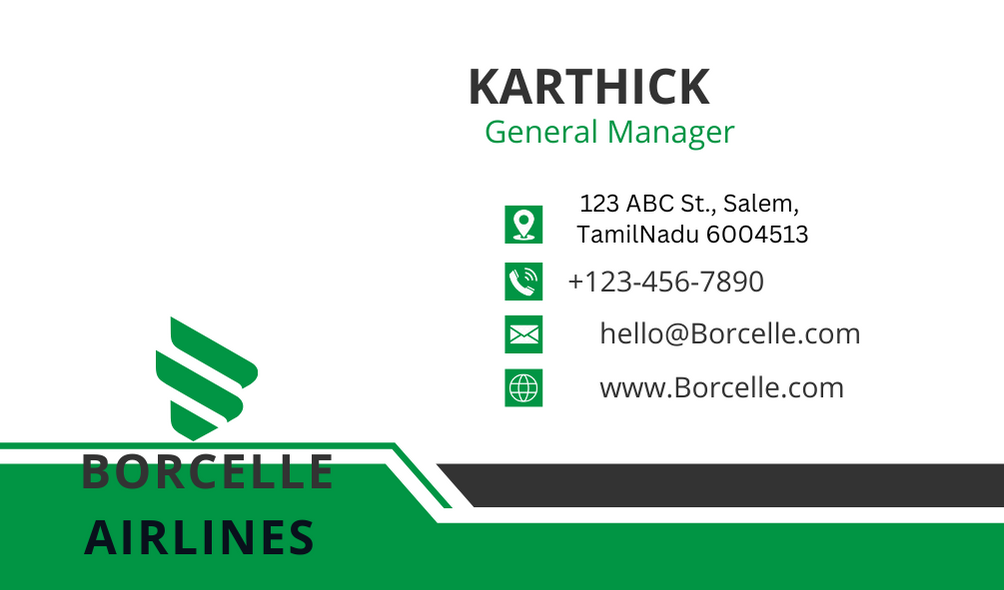

In [22]:
input_img

In [23]:
# CONVERTING IMAGE TO BYTES

Image_bytes = io.BytesIO()
input_img.save(Image_bytes, format = "PNG")

image_data = Image_bytes.getvalue()

# CREATING DICTIONARY

data = {"IMAGE":[image_data]}


df_1 = pd.DataFrame(data)

concat_df = pd.concat([df, df_1], axis = 1)

concat_df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL,WEBSITE,ADDRESS,PINCODE,IMAGE
0,KARTHICK,General Manager,BORCELLEAIRLINES,+123-456-7890,hello@Borcelle.com,www.borcelle.com,123 ABC St Salem,TamilNadu 6004513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


### SQLITE PART

In [24]:
mydb = sqlite3.connect("business_card.db")

cursor = mydb.cursor()

# TABLE CREATION

create_table_query = '''CREATE TABLE IF NOT EXISTS business_card_details(name varchar (225),
                                                                          designation varchar (225),
                                                                          company_name varchar(225),
                                                                          contact varchar(225),
                                                                          email varchar (225),
                                                                          website text,
                                                                          address text,
                                                                          pincode varchar (225),
                                                                          image text)'''
cursor.execute(create_table_query)

mydb.commit()

In [25]:
# INSERT QUERY

insert_query = '''INSERT INTO business_card_details(name, designation, company_name, contact, email, website, address, pincode, image)
                  VALUES(?,?,?,?,?,?,?,?,?)'''

datas = concat_df.values.tolist()[0]

cursor.execute(insert_query, datas)

mydb.commit()

In [26]:
# SELECT QUERY

mydb = sqlite3.connect("business_card.db")
cursor = mydb.cursor()

select_query = "SELECT NAME FROM business_card_details"

cursor.execute(select_query)
table1 = cursor.fetchall()
mydb.commit()

names = []

for i in table1:
  names.append(i[0])

names  

['KARTHICK']

In [27]:
datas = concat_df.values.tolist()[0]

datas

['KARTHICK',
 'General Manager',
 'BORCELLEAIRLINES',
 '+123-456-7890',
 'hello@Borcelle.com',
 'www.borcelle.com',
 '123 ABC St  Salem',
 'TamilNadu 6004513',
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xec\x00\x00\x02N\x08\x06\x00\x00\x00-z\x8d\xd9\x00\x01\x00\x00IDATx\x9c\xec\xddg|\x1c\xd5\xd9\xf7\xf1\xdf\x94-Z\xf5b\xc9\x92\xdcm\xb9wc\x1b\xb0M5q\xc0\xf4\x92@\x02\xa1Ch\xa97\x10B\x1aIH\x05\x92\x10H \xc1\x81\x07\x08%\x10\xaa\xe9\x18\x1c\xc0\x18\xdc\x8b\xe4\xde\x9bd\xab\xb7\x95\xb6\xcc\xcc\xf3bu\xc6\xb3*.`\xb0\x0c\xd7\xf7\xfe(\xb6\xb5\xbb3g\x8an\xf4\x9fs\xceu4\xc7q\x1c\x84\x10B\x08!\x84\x10B\x08\xd1\xad\xe8\x87\xbb\x01B\x08!\x84\x10B\x08!\x84\xe8H\x02\xbb\x10B\x08!\x84\x10B\x08\xd1\rI`\x17B\x08!\x84\x10B\x08!\xba!\t\xecB\x08!\x84\x10B\x08!D7$\x81]\x08!\x84\x10B\x08!\x84\xe8\x86$\xb0\x0b!\x84\x10B\x08!\x84\x10\xdd\x90\x04v!\x84\x10B\x08!\x84\x10\xa2\x1b\x92\xc0.\x84\x10B\x08!\x84\x10BtC\x12\xd8\x85\x10B\x08!\x84\x10B\x88nH\x02\xbb\x10B\x08!\x84\x10B\x08\xd1\rI`\x17B\x08!\x84\x10B\